Saving 1694806123216.jpeg to 1694806123216.jpeg


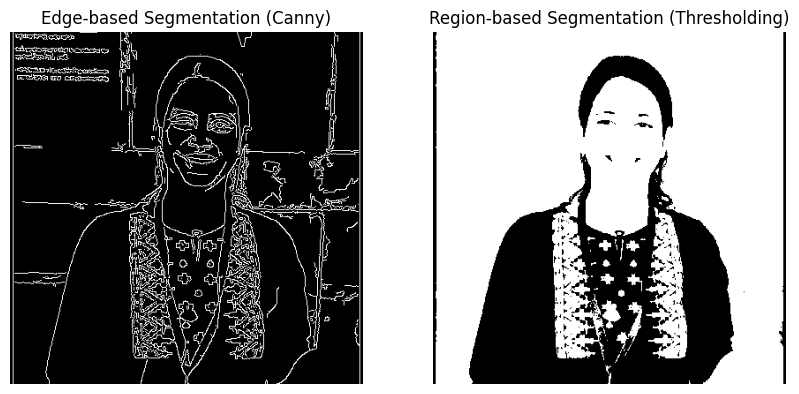

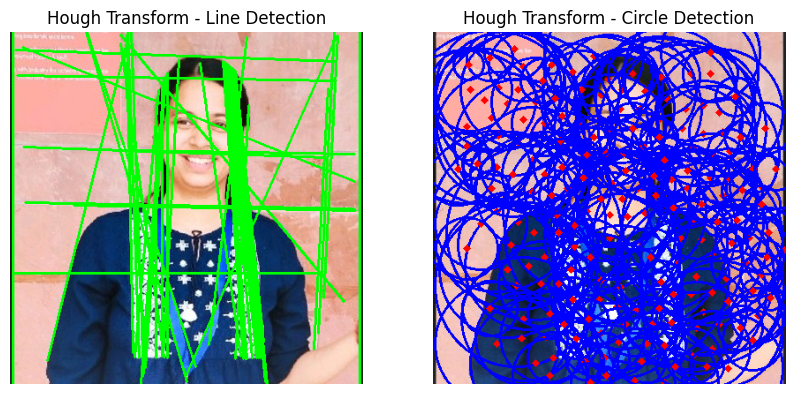

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image in Google Colab
from google.colab import files
uploaded = files.upload()

# Load the image
filename = list(uploaded.keys())[0]
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Edge-based segmentation using Canny edge detector
edges = cv2.Canny(gray, 50, 150)

# Display the edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title("Edge-based Segmentation (Canny)")
plt.axis("off")

# Region-based segmentation using thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Region-based Segmentation (Thresholding)")
plt.axis("off")
plt.show()

# Hough Transform for line detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

# Draw detected lines on the image
line_img = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Transform for circle detection
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=100)

# Draw detected circles
circle_img = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (255, 0, 0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (0, 0, 255), 3)  # Center of the circle

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title("Hough Transform - Line Detection")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB))
plt.title("Hough Transform - Circle Detection")
plt.axis("off")
plt.show()


In [2]:
# Install dependencies
!pip install opencv-python ultralytics

# Import necessary libraries
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import numpy as np

# Install dependencies
!pip install opencv-python torch torchvision

# Import necessary libraries
import cv2
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F
from google.colab import files


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.3/915.3 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

Saving 1694806123216.jpeg to 1694806123216 (1).jpeg


100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]



0: 640x640 1 person, 1 tie, 8.0ms
Speed: 15.5ms preprocess, 8.0ms inference, 342.1ms postprocess per image at shape (1, 3, 640, 640)


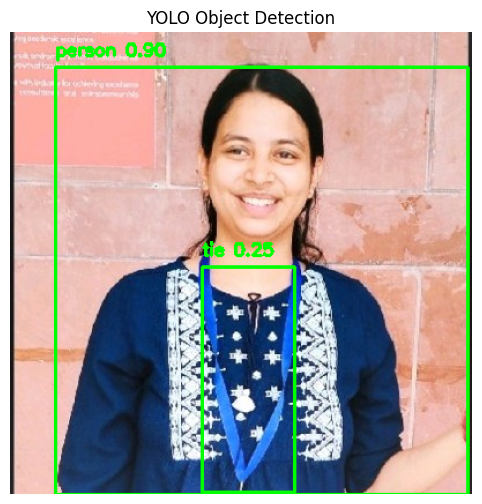

In [5]:
# Upload an image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the YOLOv8 model (pre-trained weights)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is the nano version for fast convergence

# Read and process the image
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform object detection
results = model(image)

# Draw bounding boxes on the detected objects
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        class_id = int(box.cls[0])  # Get class ID
        confidence = float(box.conf[0])  # Confidence score
        label = f"{model.names[class_id]} {confidence:.2f}"
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the detected objects
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("YOLO Object Detection")
plt.axis("off")
plt.show()


Saving 1694806123216.jpeg to 1694806123216 (2).jpeg


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 172MB/s]


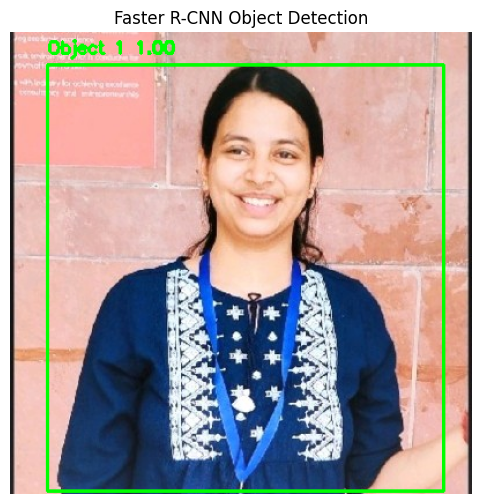

In [7]:

# Upload an image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the Faster R-CNN model (pre-trained on COCO dataset)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Read the image and convert to RGB
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to tensor
image_tensor = F.to_tensor(image_rgb).unsqueeze(0)

# Perform object detection
with torch.no_grad():
    predictions = model(image_tensor)

# Process detections
threshold = 0.5  # Confidence threshold for displaying detections
for idx in range(len(predictions[0]['boxes'])):
    score = predictions[0]['scores'][idx].item()
    if score > threshold:
        x1, y1, x2, y2 = map(int, predictions[0]['boxes'][idx])
        label = f"Object {idx+1} {score:.2f}"
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the detected objects
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Faster R-CNN Object Detection")
plt.axis("off")
plt.show()
